In [425]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data


In [426]:
# Load the dataset using pandas csv method
# Save the dataset as variable uspopdata
data = pd.read_csv('us_pop_data.csv')

# Call the data head () to glance at the shape
data.head()

,year,us_pop
0,1790,3929326
1,1800,5308483
2,1810,7239881
3,1820,9638453
4,1830,12866020


In [427]:
data['number of years'] = ['0', '10', '20' , '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220']
data.head()

data['us_pop_in_millions'] = (data['us_pop']/1000000).apply(lambda x: '{:,.2f}MM'.format(x))
data.head()
data.us_pop_in_millions = data.us_pop_in_millions.apply(lambda x: float(x.strip('M'))*1000000)
data.head()

data = data.apply(pd.to_numeric)

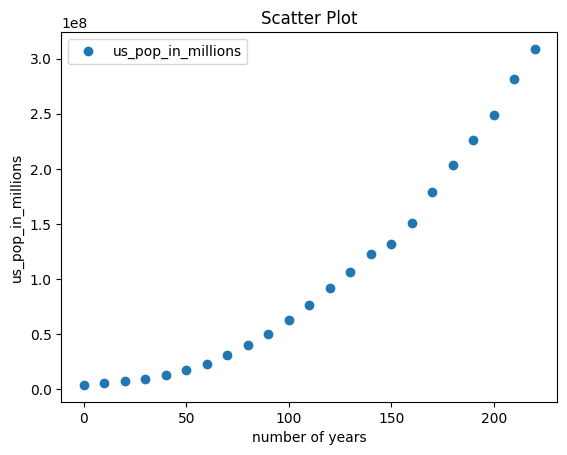

In [428]:

# Visualize the change in  variables
data.plot( x= 'number of years', y= 'us_pop_in_millions', style = 'o' )
plt.xlabel('number of years')
plt.ylabel('us_pop_in_millions')
plt.title('Scatter Plot')
plt.show()



In [429]:
data.shape

(23, 4)

In [430]:
data.dtypes

year                    int64
us_pop                  int64
number of years         int64
us_pop_in_millions    float64
dtype: object

In [431]:
data['number of years'].describe()

count     23.0000
mean     110.0000
std       67.8233
min        0.0000
25%       55.0000
50%      110.0000
75%      165.0000
max      220.0000
Name: number of years, dtype: float64

In [432]:
data['us_pop_in_millions'].describe()

count    2.300000e+01
mean     1.039913e+08
std      9.617961e+07
min      3.930000e+06
25%      2.013000e+07
50%      7.621000e+07
75%      1.650100e+08
max      3.087500e+08
Name: us_pop_in_millions, dtype: float64

In [433]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [437]:
X = data['number of years'].values.reshape(-1,1)
y = data['us_pop_in_millions'].values.reshape(-1,1)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [439]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [440]:
print(regressor.intercept_)

[-37888600.82304527]


In [441]:
print(regressor.coef_)

[[1289110.06486713]]


In [442]:
y_pred = regressor.predict(X_test)

Root-squared is: [0.91676728]


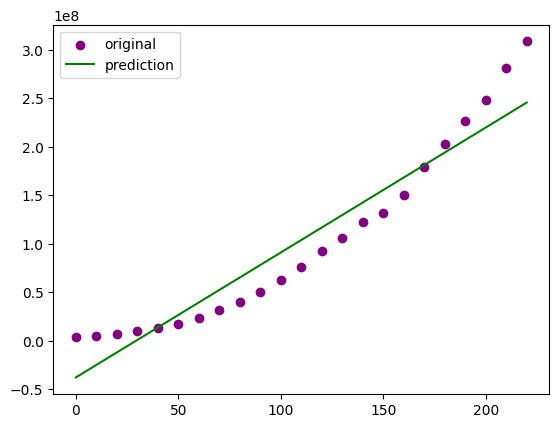

In [443]:
yhat = -37888600.82304527+(1289110.06486713)*X
d = y -yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2))/sum((y-np.mean(y))**2)

print ("Root-squared is:", r2_f)

plt.scatter(X, y, color="purple", label="original")
plt.plot(X, yhat, color="green", label="prediction")
plt.legend()
plt.show()

In [444]:
data['number of years squared'] = data['number of years']**2

In [445]:
data.head()

,year,us_pop,number of years,us_pop_in_millions,number of years squared
0,1790,3929326,0,3930000.0,0
1,1800,5308483,10,5310000.0,100
2,1810,7239881,20,7240000.0,400
3,1820,9638453,30,9640000.0,900
4,1830,12866020,40,12870000.0,1600


[1714308.66292024]
[[6183.96706373]]


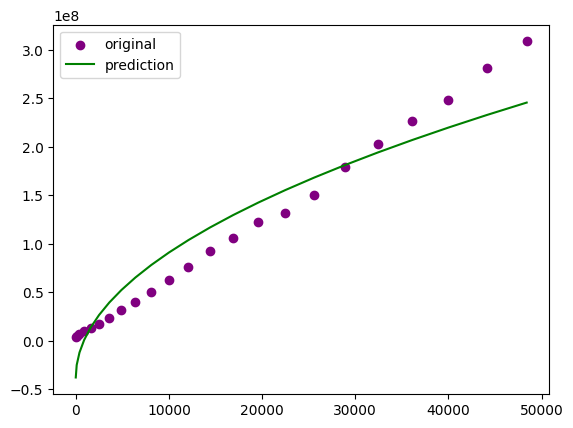

In [446]:
X = data['number of years squared'].values.reshape(-1,1)
y = data['us_pop_in_millions'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)


plt.scatter(X, y, color="purple", label="original")
plt.plot(X, yhat, color="green", label="prediction")
plt.legend()
plt.show()


In [447]:
yhat = 1714308.66292024+(6183.96706373)*X
d = y -yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2))/sum((y-np.mean(y))**2)

print ("Root-squared is:", r2_f)



Root-squared is: [0.99845086]


In [450]:
print( 'The prediction from the second model, years since 1790 squared fits the data better. This is apparent in my R-squared-values because the value of R-squared is 0.9. Indicating that 99% of the model explains the variabliliyt of the responce data around the mean. Compaired to t years since 1790 with a 92% accuarcy. ')

The prediction from the second model, years since 1790 squared fits the data better. This is apparent in my R-squared-values because the value of R-squared is 0.9. Indicating that 99% of the model explains the variabliliyt of the responce data around the mean. Compaired to t years since 1790 with a 92% accuarcy. 
